<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Correci%C3%B3n_Examen3_Mar%C3%ADnAlberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 2 - Montecarlo - 3.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

- $\frac {1}{\ b - a}\int_{a}^{b} {f(x)}\text{d}x$.

In [ ]:
import numpy as np

def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)*(b-a))


2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [ ]:
import numpy as np
import sympy as sp
def f1(x):
    return (np.log(2+ np.sin(2*x**2)))/(x*np.exp(-x**3))

In [ ]:
f

<function __main__.f(x, y)>

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [ ]:
import numpy as np
import pandas as pd

N= np.logspace(1,6,6) # para 10,100,1000, 10000, 100000, 1000000

table= pd.DataFrame(columns=["Aproximación f1(x)","Aproximación f2(x)","Aproximación f3(x)","Aproximación f4(x)","Aproximación f5(x)"], index=N)
table

,Aproximación f1(x),Aproximación f2(x),Aproximación f3(x),Aproximación f4(x),Aproximación f5(x)
10.0,NaN,NaN,NaN,NaN,NaN
100.0,NaN,NaN,NaN,NaN,NaN
1000.0,NaN,NaN,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN,NaN
100000.0,NaN,NaN,NaN,NaN,NaN
1000000.0,NaN,NaN,NaN,NaN,NaN


In [ ]:


for i in N :
    
    aprox1 = montecarlo(f1,int(i),0.1,0.3)
    table.loc[i,"Aproximación f1(x)"] =  aprox1
    
    aprox2 = montecarlo(f1,int(i),0.3,0.5)
    table.loc[i,"Aproximación f2(x)"] =  aprox2
    
    aprox3 = montecarlo(f1,int(i),0.5,0.7)
    table.loc[i,"Aproximación f3(x)"] = aprox3
    
    aprox4= montecarlo(f1,int(i),0.7,0.9)
    table.loc[i,"Aproximación f4(x)"] = aprox4
    
    aprox5= montecarlo(f1,int(i),0.9,1.1)
    table.loc[i,"Aproximación f5(x)"] = aprox5
    
    
table

,Aproximación f1(x),Aproximación f2(x),Aproximación f3(x),Aproximación f4(x),Aproximación f5(x)
10.0,0.792692,0.444572,0.408692,0.462162,0.60951
100.0,0.806748,0.46282,0.408457,0.457838,0.588918
1000.0,0.816521,0.455979,0.408173,0.4553,0.584949
10000.0,0.80611,0.455288,0.408151,0.455314,0.58364
100000.0,0.805682,0.455538,0.408146,0.455642,0.583679
1000000.0,0.807073,0.455539,0.408143,0.455752,0.58373


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [ ]:
y_01 = 0.1
y_03 = y_01 + 0.806789
y_05 = y_03 + 0.455585
y_07 = y_05 + 0.408145
y_09 = y_07 + 0.455741
y_11 = y_09 + 0.583674

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

## Código incorrecto

### No tuve tiempo para hacer este código y solamente pegué la función para definir una función. La función que esta ahi es de otro ejercicio.

In [ ]:
import numpy as np
import sympy as sp
def f(x) :
    return (x-2)**2 + 1
    
    sp.diff(f,x)
print(f)

<function f at 0x7f31f51136d0>


## Código correcto

### Definí la función correcta

In [ ]:
def f(x,y):
    return np.exp(-0.05*(x**2+y**2))*np.sin(x**2+y**2) > 0.5
   


2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

## No existe corrección porque no logré hacer nada de este código sin embargo este es el código correcto. 

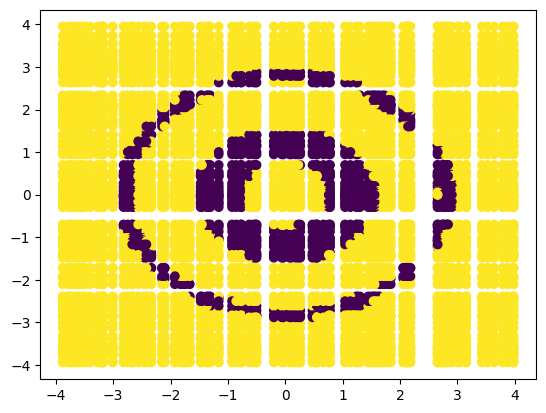

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-4, 4, 100)
y = np.random.uniform(-4, 4, 100)

X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c =~ f(X,Y))

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [ ]:
def montecarlo_general (region,ax,bx,ay,by,N):
    x = np.random.uniform( ax, bx ,N)
    y = np.random.uniform( ax, bx ,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

In [ ]:
montecarlo_general(f, -4,4,-4,4,1000)

12.288

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [ ]:

N= [10000, 100000, 1000000] 


table= pd.DataFrame(columns=["Aproximación f(x)", "Error"], index=N)
table

,Aproximación f(x),Error
10000,NaN,NaN
100000,NaN,NaN
1000000,NaN,NaN


## Código incorrecto

### El error fue intentar darles valores a pi cuando no lo necesitaba e intentar tenerlo exactamente como el código que hicimos en clase. También no tuve tiempo de graficarlo en 3D y creo que no valia la pena porque la gráfica en 2D estaba mal.

---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [ ]:
import numpy as np
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi' ,'ci', 'di', 'ei', 'fi', 'pi'], dtype='float')
df.index.name = "$i$"


A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [ ]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi' ,'ci', 'di', 'ei', 'fi', 'pi'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0,0.85,0.2,-0.2]
df['bi'] = [0,0,-0.2,0.2]
df['ci'] = [0,0,0,0]
df['di'] = [0,0,0.2,0.2]
df['ei'] = [0.18,0.85,0.2,0.2]
df['fi'] = [0,0.1,0,0]
df['gi'] = [0,0,0,0]
df['hi'] = [0,-0.1,0,0]
df['ii'] = [0,0.85,0.3,0.3]
df['ji'] = [0,0,0,0]
df['ki'] = [0,1.6,0.8,0.8]
df['pi'] = [0,0,0,0]


df.round(2)

,ai,bi,ci,di,ei,fi,pi,gi,hi,ii,ji,ki
$i$,,,,,,,,,,,,
0,0.00,0.0,0,0.0,0.18,0.0,0,0,0.0,0.00,0,0.0
1,0.85,0.0,0,0.0,0.85,0.1,0,0,-0.1,0.85,0,1.6
2,0.20,-0.2,0,0.2,0.20,0.0,0,0,0.0,0.30,0,0.8
3,-0.20,0.2,0,0.2,0.20,0.0,0,0,0.0,0.30,0,0.8


In [ ]:
import random
random.seed(0)

A0 = np.array([[0.5,0],
               [0, 0.5]])
b0 = np.array([1.0, 1.0])

A1 = np.array([[0.5, 0],
               [0, 0.5]])
b1 = np.array([50, 1])

A2 = np.array([[0.5, 0],
               [0, 0.5]])
b2 = np.array([1, 50])

A3 = np.array([[0.5, 0],
               [0, 0.5]])
b3 = np.array([50, 50])


In [ ]:
from pandas.core.internals.blocks import F
import random
random.seed(0)

x = [0]
y = [0]

N = 10000

for k in range (N):
  i_actual = random.choices(i, df["pi"])
  
  a = float(df["ai"][i_actual]) 
  b = float(df["bi"][i_actual]) 
  c = float(df["ci"][i_actual]) 
  d = float(df["di"][i_actual]) 
  e = float(df["ei"][i_actual]) 
  f = float(df["fi"][i_actual]) 

  xkm1 = a*x[-1] + b*y[-1] + e
  ykm1 = c*x[-1] + d*y[-1] + f

  x.append(xkm1)
  y.append(ykm1)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,10))
plt.scatter(x,y, s=1, c="g")

## Código correcto

### agregé un x=np.array([0,0,0]) para indicar que las coordenadas x y z empiezan en cero. Después cree tres listas para guardar los valores de x y z dada por la función de random.choices. Después agregué un for k in range (N) donde N= 1000 para indicar la cantidad de veces que va hacer el proceso de random y la multiplicación de matrices.

In [ ]:
import numpy as np
import random



A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

# Vector inicial x
x = np.array([0,0,0])

# Listas para almacenar las coordenadas de x en cada iteración del bucle for
x_historial = [0]
y_historial = [0]
z_historial = [0]

# Número de iteraciones que se realizarán en el bucle for
N = 1000

# Listas con las matrices A y vectores b
A_lista = [A0,A1,A2,A3]
b_lista = [b0,b1,b2,b3]

# Lista con los índices de las matrices A y vectores b
i = [0,1,2,3]

# Bucle for para calcular las coordenadas de x en cada iteración y almacenarlas en las listas correspondientes
for k in range(N):
    i_actual = random.choices(i)[0]
    
    A = A_lista[i_actual]
    b = b_lista[i_actual]
    
    x = A @ x + b
    
    x_historial.append(x[0])
    y_historial.append(x[1])
    z_historial.append(x[2])



Se lleva a cabo un bucle for que realiza N iteraciones. En cada iteración, se selecciona aleatoriamente un índice de la lista i. A continuación, se seleccionan las matrices A y los vectores b correspondientes al índice seleccionado, y se lleva a cabo la operación A@x+b, que equivale a la multiplicación matricial de la matriz A por el vector x y la suma del vector b. El resultado se almacena en el vector x. Después se añade cada componente del vector x a su correspondiente lista x_historial, y_historial, z_historial.

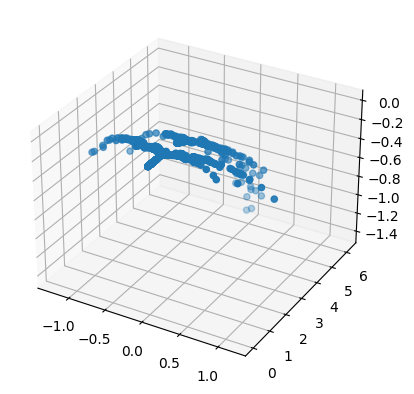

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Graficar las trayectorias en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_historial, y_historial, z_historial)
plt.show()


## Correción 

### Este código en general esta bien, solamente el punto donde pide modificar la función sim_r para que en lugar de pasarle el inicio y periodos puedas pasarle fecha de inicio y fin. Por lo tanto solo vamos a modificar ese código.

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Mercado Libre** o **Netflix**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 5 de noviembre del 2022.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [ ]:
# Instalación del paquete
!pip install yfinance

# conda install pandas-datareader
# pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]


2. Obtenga los precios de cierre ajustados para Netflix y Mercado Libre desde el 5 de noviembre de 2020 al 5 de noviembre de 2022.

In [ ]:
ticker = "NFLX","MELI"
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2020-11-05" #inicio de datos
final = "2022-11-05" #final de datos
fecha = "2022-11-06" # Primer dato a simular
ffinal = "2023-02-10" #ultimo dato a simular
per = 365 # Datos futuros a simular
data = getClose(ticker,inicio,final)
#data_aapl.plot.hist()

[*********************100%***********************]  2 of 2 completed


In [ ]:
data

,MELI,NFLX
Date,,
2020-11-05,1437.800049,513.760010
2020-11-06,1485.859985,514.729980
2020-11-09,1330.719971,470.500000
2020-11-10,1226.030029,480.239990
2020-11-11,1304.489990,490.760010
...,...,...
2022-10-31,901.619995,291.880005
2022-11-01,919.340027,286.750000
2022-11-02,851.280029,273.000000


3. Calcule el rendimiento **simple** para ambas empresas.

In [ ]:
N = (data["NFLX"] - data["NFLX"].shift())/data["NFLX"].shift()
M = (data["MELI"] - data["MELI"].shift())/data["MELI"].shift()

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

## Código incorrecto

### como no sabia como calcular la cantidad de días entre dos fechas, lo que hice fue buscar datos de close entre esas fechas y contar la cantidad de datos en el dataframe. Y seguí usando la misma función de antes. 

In [ ]:
periodos = 1257 # Cantidad en dias de simulaciones

fecha = "2022-11-05" # Primer dato a simular
fecha_final = "2023-02-10" #ultimo dato a simular


In [ ]:

datal = getClose(ticker,fecha,fecha_final)

[*********************100%***********************]  2 of 2 completed


In [ ]:
datal

,MELI,NFLX
Date,,
2022-11-07,940.780029,258.600006
2022-11-08,937.080017,263.459991
2022-11-09,897.619995,254.660004
2022-11-10,935.530029,274.970001
2022-11-11,974.890015,290.130005
...,...,...
2023-02-03,1187.250000,365.899994
2023-02-06,1175.439941,361.480011
2023-02-07,1173.810059,362.950012


In [ ]:
per = len(datal["NFLX"]) + 32
per

97

In [ ]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)

## Código correcto

### En el código pd.date_range cambie las variables inicio,periodos por inicio y fin. Para que el código     return pd.DataFrame(index=fechas, data=r) devuelva un dataframe de todas las fechas que existen entre las dos fechas seleccionadas.

In [ ]:
def sim_r(media,std,inicio,final,N):
    #Se define la función sim_r con cinco argumentos: media, std, inicio, final y N.

    r= np.random.normal(media,std,size=(len(pd.date_range(inicio, final)), N))
    #Se utiliza la función np.random.normal de NumPy para generar una matriz de datos aleatorios con la media y la desviación estándar especificadas en media y std, respectivamente.
    #La matriz de datos se genera con la función np.random.normal utilizando el tamaño (len(pd.date_range(inicio, final)), N), que representa el número de fechas en el rango especificado y el número de simulaciones N.
    fechas= pd.date_range(fecha,ffinal)
    #Se crea un objeto DatetimeIndex de pandas utilizando la función pd.date_range con el rango de fechas especificado por inicio y final.
    return pd.DataFrame(index=fechas, data=r)
    #e devuelve un objeto DataFrame de pandas con la matriz de datos aleatorios r y el índice de fechas fechas.

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 5 de noviembre de 2022 al 10 de febrero de 2023.

In [ ]:
R_nflx_mean = N.mean()
R_nflx_std = N.std()

R_meli_mean = M.mean()
R_meli_std = M.std()


In [ ]:

r_nflx_simulados = sim_r(R_nflx_mean, R_nflx_std, fecha, ffinal, 100000)
r_nflx_simulados



,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,0.062228,0.021822,0.020653,-0.021779,-0.022013,0.050245,0.033225,0.082310,0.020899,0.008726,...,0.043350,-0.035927,0.004489,0.014974,-0.006589,-0.014002,0.035127,-0.051198,0.021725,-0.015709
2022-11-06,-0.051074,-0.018510,0.028607,0.020426,-0.041843,-0.009674,-0.046321,0.018780,0.041872,-0.046449,...,0.000973,-0.046101,0.011179,0.012466,-0.058143,0.003941,-0.018147,0.025580,-0.044955,0.047785
2022-11-07,0.027275,-0.061724,0.004206,-0.038885,-0.004267,-0.049412,-0.010720,0.050534,-0.050508,-0.040576,...,-0.003817,0.006240,-0.042819,0.004082,0.027744,-0.038667,-0.028903,-0.024847,-0.067442,-0.015762
2022-11-08,-0.051643,0.008216,-0.052742,-0.018362,-0.034349,-0.023221,-0.019467,0.001036,0.037115,-0.043298,...,-0.026309,0.051089,0.013275,0.029627,0.019969,0.021196,-0.040653,-0.013527,-0.005879,-0.031887
2022-11-09,-0.004988,0.005902,0.009039,-0.019505,-0.058862,0.000148,0.047885,-0.008193,0.024073,-0.011958,...,-0.025921,-0.014679,0.010936,0.003782,-0.012267,0.071229,-0.037985,0.035848,0.003166,0.050135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,-0.015342,0.034188,-0.000216,-0.024355,0.002445,0.003307,-0.020325,0.002620,-0.029581,0.017660,...,0.010835,0.024771,-0.027926,0.027164,0.023080,0.000322,-0.018915,-0.001524,-0.052109,0.030493
2023-02-07,0.022820,0.027709,-0.036741,0.037419,-0.035523,-0.018635,0.030296,-0.052127,0.007293,-0.010452,...,-0.034780,0.026779,0.045161,-0.041966,-0.000814,-0.037443,0.052207,-0.062617,0.045985,0.007532
2023-02-08,0.028618,-0.012856,0.022142,-0.023863,0.040702,0.031274,-0.006032,-0.011137,-0.015901,0.035222,...,0.016585,0.056552,0.046756,0.011406,0.005416,0.018306,-0.016209,-0.021638,-0.014459,-0.014832
2023-02-09,0.021253,0.008190,0.040606,-0.004215,0.001551,0.066771,-0.020162,-0.013577,-0.002444,-0.013034,...,-0.012118,-0.001220,0.008292,0.052850,-0.037525,-0.055963,-0.005415,0.004349,-0.009911,0.049318


In [ ]:

r_meli_simulados = sim_r(R_meli_mean, R_meli_std, fecha, ffinal, 100000)
r_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,-0.048553,0.004400,0.042227,0.048383,-0.059900,0.041390,-0.041061,0.048868,-0.020386,-0.020421,...,-0.041527,-0.005768,0.026133,-0.042446,-0.013504,-0.002049,0.003201,-0.064203,-0.061981,0.016702
2022-11-06,-0.007665,-0.035843,-0.006870,-0.000613,0.056692,-0.028804,0.039359,0.023428,-0.027340,0.007043,...,-0.095553,-0.044877,0.067711,-0.007434,-0.035683,0.093709,-0.003187,0.053245,0.059463,0.044841
2022-11-07,-0.010233,0.030265,0.004500,-0.030890,0.016865,0.008353,0.028612,-0.037664,-0.014784,0.051073,...,-0.007869,0.043148,-0.006201,-0.037073,-0.036810,0.017342,-0.028509,-0.021973,-0.004714,0.058608
2022-11-08,-0.082937,0.067352,-0.036210,0.050000,0.034430,0.009220,0.066578,0.003943,0.076752,-0.019907,...,-0.046972,0.001213,0.044815,-0.000765,-0.012717,-0.038035,0.003449,-0.018080,0.006052,-0.015231
2022-11-09,0.042016,-0.029688,0.068492,-0.011670,0.003470,0.032778,0.017532,-0.054894,-0.021694,-0.043312,...,0.027346,0.073217,0.081906,-0.033950,-0.091446,0.044098,-0.090603,-0.025639,0.012078,-0.049815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,-0.022322,-0.014735,-0.032306,-0.030601,-0.006536,-0.029706,-0.016045,-0.009184,0.035530,0.050343,...,-0.019171,-0.043811,0.019292,0.017549,-0.014710,-0.009169,0.011022,0.005010,-0.069523,-0.046611
2023-02-07,-0.034415,-0.017779,-0.091198,-0.063151,-0.042621,0.049972,0.075082,0.039741,-0.037953,-0.040681,...,0.078037,0.035475,-0.027626,-0.008221,0.008344,-0.085824,0.037324,0.020708,-0.025305,-0.001417
2023-02-08,0.002803,-0.011596,0.001220,0.004043,-0.000172,0.032450,-0.040430,-0.001107,0.033058,0.038153,...,0.056461,-0.035892,-0.010063,-0.031310,-0.087011,-0.004479,0.010918,0.071872,-0.011530,-0.004024
2023-02-09,0.054615,0.032066,0.057086,-0.024819,-0.062669,-0.008727,0.017846,0.049745,-0.000378,0.009514,...,0.015722,-0.028564,0.021204,-0.000590,-0.010990,-0.046452,0.030554,-0.010350,0.006483,-0.052688


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [ ]:
precios_meli_simulados = (r_meli_simulados + 1).cumprod()*data["MELI"][-1] # r_simulados son cumprod es producto acumulado
precios_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,892.999347,942.699493,978.202711,983.980790,882.349990,977.417003,900.031106,984.435662,919.436513,919.403060,...,899.593606,933.156792,963.097640,898.731573,925.895660,936.646582,941.574657,878.311422,880.396061,954.245535
2022-11-06,886.154413,908.910483,971.482820,983.377730,932.372463,949.263951,935.455349,1007.499214,894.299249,925.878734,...,813.634921,891.279733,1028.309499,892.050016,892.856966,1024.418885,938.574238,925.077036,932.746950,997.035152
2022-11-07,877.086285,936.418543,975.854784,953.001218,948.096517,957.193324,962.220384,969.553139,881.078252,973.166314,...,807.232585,929.736831,1021.933249,858.979392,859.990482,1042.183860,911.816478,904.749985,928.350126,1055.469039
2022-11-08,804.343035,999.487878,940.519089,1000.650991,980.739416,966.018206,1026.282796,973.375726,948.702379,953.793356,...,769.315658,930.865019,1067.731118,858.322684,849.054022,1002.544480,914.961702,888.392533,933.968614,1039.392710
2022-11-09,838.138218,969.814911,1004.937163,988.973288,984.142197,997.682213,1044.276081,919.943076,928.121451,912.482575,...,790.353396,999.020189,1155.184691,829.182318,771.411005,1046.754983,832.063042,865.614918,945.248818,987.615828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,897.512346,1136.376018,434.621271,1616.825776,758.152375,1475.546728,1120.177098,788.031882,1947.596430,605.954021,...,719.192686,856.814144,1463.025884,609.411326,688.204206,516.798955,619.158042,1214.170368,709.872449,880.519520
2023-02-07,866.624222,1116.172790,394.984563,1514.721754,725.838944,1549.283419,1204.281741,819.349170,1873.679180,581.303372,...,775.316140,887.209431,1422.608161,604.401196,693.946334,472.445071,642.267583,1239.313034,691.908928,879.271702
2023-02-08,869.053055,1103.229806,395.466310,1520.846187,725.713792,1599.556950,1155.592711,818.442181,1935.618574,603.481988,...,819.091500,855.365443,1408.293137,585.477134,633.565394,470.328921,649.279858,1328.384962,683.931021,875.733116
2023-02-09,916.516347,1138.605841,418.042015,1483.100250,680.234141,1585.597896,1176.215392,859.155611,1934.886215,609.223496,...,831.969428,830.932867,1438.154051,585.131827,626.602500,448.481084,669.118277,1314.636358,688.364682,829.592078


In [ ]:
precios_nflx_simulados = (r_nflx_simulados + 1).cumprod()*data["NFLX"][-1] # r_simulados son cumprod es producto acumulado
precios_nflx_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,277.018433,266.481059,266.176095,255.110199,255.049329,273.893411,269.454663,282.255670,266.240349,263.065726,...,272.095332,251.420626,261.960645,264.695063,259.071612,257.138512,269.950869,247.437996,266.455543,256.693369
2022-11-06,262.869910,261.548497,273.790616,260.321065,244.377186,271.243862,256.973234,287.556498,277.388325,250.846543,...,272.360024,239.830001,264.889185,267.994876,244.008454,258.151884,265.052195,253.767475,254.477010,268.959361
2022-11-07,270.039698,245.404640,274.942278,250.198584,243.334425,257.841039,254.218517,302.088002,263.377866,240.668299,...,271.320351,241.326496,253.546872,269.088903,250.778321,248.169898,257.391441,247.462189,237.314536,264.719903
2022-11-08,256.094141,247.420830,260.441209,245.604368,234.976187,251.853631,249.269705,302.401080,273.153178,230.247800,...,264.182180,253.655634,256.912683,277.061203,255.786182,253.430165,246.927759,244.114830,235.919442,256.278793
2022-11-09,254.816691,248.881215,262.795407,240.813837,221.144949,251.890880,261.205914,299.923459,279.728898,227.494584,...,257.334372,249.932240,259.722407,278.109130,252.648504,271.481775,237.548250,252.865752,236.666410,269.127239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,180.850068,135.477185,186.684870,177.591694,158.329104,227.997864,215.984438,289.609498,441.665468,147.548507,...,253.612378,232.741323,139.198789,272.145681,203.190441,329.652055,293.497022,161.197015,123.288142,225.451711
2023-02-07,184.977007,139.231064,179.825833,184.236927,152.704831,223.749040,222.527902,274.513057,444.886747,146.006264,...,244.791729,238.973825,145.485122,260.724727,203.025084,317.309036,308.819545,151.103414,128.957503,227.149777
2023-02-08,190.270710,137.441101,183.807616,179.840406,158.920256,230.746583,221.185666,271.455883,437.812416,151.148961,...,248.851535,252.488364,152.287410,263.698682,204.124684,323.117846,303.813831,147.833851,127.092861,223.780645
2023-02-09,194.314579,138.566691,191.271262,179.082376,159.166806,246.153785,216.726063,267.770356,436.742408,149.178945,...,245.836009,252.180412,153.550160,277.635039,196.464894,305.035172,302.168784,148.476836,125.833247,234.816962


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

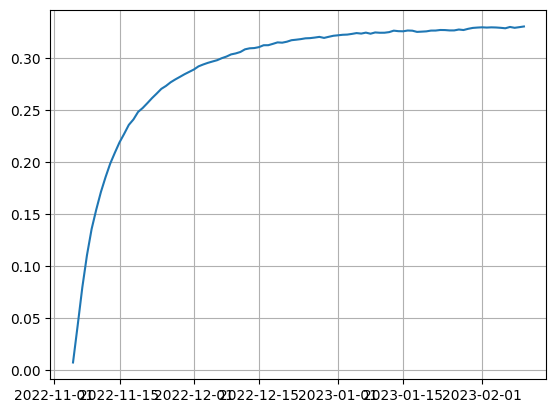

In [ ]:
valor_deseado = data["MELI"][-1]*1.10
#data_aapl[-1]*1.10
probabilidad = (precios_meli_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

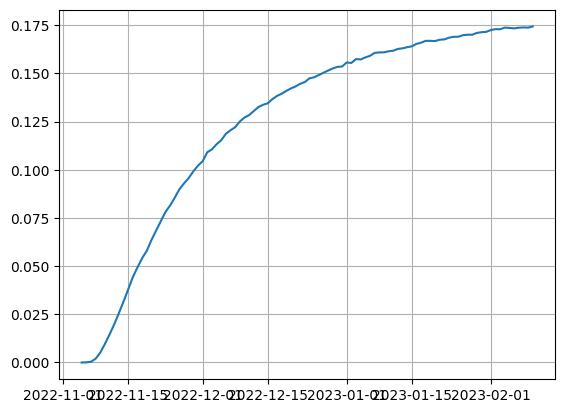

In [ ]:
valor_deseado = data["NFLX"][-1]*1.20
#data_aapl[-1]*1.10
probabilidad = (precios_nflx_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

#### Extra <font size='1'>(10 puntos)</font>

Utiliza el rendimiento logarítimico y compara los resultados.

In [ ]:
nflx = precios_nflx_simulados.mean(axis=1)
meli = precios_meli_simulados.mean(axis=1)



In [ ]:
r = np.log(data["NFLX"]/data["NFLX"].shift())
R = np.log(data["MELI"]/data["MELI"].shift())

R_nflx_mean = r.mean()
R_nflx_std = r.std()

R_meli_mean = R.mean()
R_meli_std = R.std()


In [ ]:
r_nflx_simulados = sim_r(R_nflx_mean, R_nflx_std, fecha, ffinal, 100000)
r_nflx_simulados


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,-0.052395,0.038948,-0.026422,-0.035763,-0.007195,-0.028394,-0.064642,0.035702,0.021857,0.058262,...,-0.014573,0.004368,-0.031033,-0.047957,-0.046197,0.020281,-0.027532,-0.029356,0.051392,-0.025872
2022-11-06,0.050984,0.002890,-0.005148,-0.004768,-0.093355,0.059371,-0.013011,0.028395,-0.015655,0.081274,...,0.020312,0.042290,0.045728,0.003917,-0.024164,-0.025090,0.074268,0.026218,-0.007984,0.050117
2022-11-07,0.011809,-0.021153,-0.051671,0.039031,-0.071872,0.011328,0.050652,0.012993,-0.056739,0.000663,...,-0.018950,-0.045394,0.021190,-0.071184,0.021797,-0.046202,-0.040195,0.044551,-0.056402,-0.039917
2022-11-08,0.063036,-0.012663,0.038884,0.030486,-0.013750,-0.020505,-0.033346,0.005857,0.025906,-0.067655,...,-0.016090,0.048759,-0.028591,-0.010924,-0.035743,0.020257,0.008652,0.010203,0.025455,-0.019860
2022-11-09,0.014331,0.095672,0.004499,0.006196,-0.025425,0.054016,0.003727,-0.047402,-0.074478,-0.016696,...,0.015860,0.010981,-0.010762,-0.027706,-0.014098,0.015085,0.007078,-0.028709,0.023520,0.020587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,0.025011,0.025396,0.099025,-0.025096,-0.014701,0.005553,-0.008487,0.027115,0.045415,-0.051145,...,0.024595,0.029546,0.040363,0.035675,-0.028346,0.008653,0.014501,-0.026795,0.032666,-0.002143
2023-02-07,0.081635,-0.050368,-0.006845,-0.066408,-0.012329,-0.016307,-0.030818,-0.029022,0.012128,-0.072252,...,-0.018391,-0.039949,-0.015345,-0.020546,0.010559,0.027618,0.013215,0.015755,-0.003387,0.030374
2023-02-08,0.020878,0.065803,-0.025156,0.030394,-0.055212,-0.088642,-0.022140,0.012838,-0.012230,-0.018160,...,0.014511,0.042109,0.072314,0.004783,0.018284,0.047317,0.023003,-0.014508,0.012577,0.021798
2023-02-09,-0.010436,0.008661,0.054681,-0.002282,-0.008210,-0.009675,0.039847,0.017911,0.009061,0.032372,...,0.003731,-0.063830,-0.004888,0.002877,0.001665,0.065540,0.013701,0.010077,0.003721,0.023892


In [ ]:
r_meli_simulados = sim_r(R_meli_mean, R_meli_std, fecha, ffinal, 100000)
r_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,0.026019,0.068872,0.024067,-0.014325,0.058560,0.032905,0.063205,-0.010952,0.014352,0.067992,...,-0.019292,-0.006926,0.042547,0.025422,-0.046240,0.000538,-0.018899,-0.017245,0.026977,-0.052873
2022-11-06,-0.022282,-0.005857,0.036658,0.037933,0.022764,-0.026104,0.081376,0.074200,-0.017825,0.054313,...,-0.042854,0.101573,0.058272,0.023636,0.034255,-0.003192,0.035092,-0.007934,-0.024192,-0.025215
2022-11-07,-0.029579,-0.022228,-0.005130,-0.013012,-0.043796,-0.041736,-0.001667,0.054887,0.029902,0.039745,...,0.134390,-0.035639,-0.017020,-0.045246,0.009377,-0.050497,-0.045814,-0.007377,-0.118305,-0.032116
2022-11-08,0.049176,0.065480,0.009916,-0.064965,0.012744,0.005808,-0.097143,0.023551,0.011697,-0.042349,...,0.035206,0.032636,-0.034797,0.066735,0.009067,0.012734,-0.024850,0.005616,0.011986,-0.003245
2022-11-09,0.011184,0.008254,-0.022476,0.053473,0.015180,0.018445,-0.068508,0.017674,-0.010316,0.007595,...,0.014018,0.089779,-0.001245,-0.038237,-0.029193,0.019115,-0.001582,-0.040200,0.024984,-0.093583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,0.033068,0.070775,0.014531,-0.008616,-0.069143,0.026125,-0.101879,-0.017175,0.003759,0.000044,...,0.034714,-0.066518,-0.012306,0.006732,-0.071695,0.023705,0.045588,0.037002,-0.046165,0.050415
2023-02-07,-0.081239,0.023285,0.029013,-0.011631,-0.007678,-0.005525,0.011842,0.032232,0.010849,-0.045107,...,-0.023288,-0.041142,-0.005748,-0.032255,0.045413,0.052213,0.010079,0.017418,0.016025,0.014841
2023-02-08,0.014921,-0.012539,0.020821,-0.034387,0.026223,-0.051450,-0.025914,0.016473,-0.055087,0.009100,...,0.081109,0.052433,0.003114,-0.028981,0.021016,0.010554,-0.030615,0.002242,0.025971,-0.090544
2023-02-09,-0.026251,0.030925,-0.004121,0.007704,0.005899,-0.026016,0.012718,-0.012118,-0.067870,0.026547,...,0.018176,0.045054,-0.045779,0.000528,-0.035030,-0.004774,0.067728,-0.040459,0.032046,0.021583


In [ ]:
precios_log_meli_simulados = (r_meli_simulados + 1).cumprod()*data["MELI"][-1] # r_simulados son cumprod es producto acumulado
precios_log_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,962.990242,1003.211666,961.158644,925.124793,993.532885,969.453270,997.892733,928.291016,952.040335,1002.385473,...,920.462823,932.069827,978.503433,962.430612,895.170964,939.075032,920.831971,922.384229,963.889815,888.944583
2022-11-06,941.533238,997.335761,996.392770,960.217214,1016.149908,944.146843,1079.096970,997.170322,935.070575,1056.828434,...,881.017669,1026.743041,1035.523180,985.178854,925.834732,936.077281,953.145430,915.065607,940.571171,866.529602
2022-11-07,913.683266,975.166675,991.281430,947.722810,971.646102,904.741932,1077.297984,1051.901920,963.031308,1098.832095,...,999.417668,990.150908,1017.898438,940.603123,934.516442,888.808491,909.478010,908.315507,829.296675,838.700034
2022-11-08,958.614212,1039.020643,1001.111028,886.153650,984.028620,909.996966,972.646502,1076.675178,974.295983,1052.297536,...,1034.603660,1022.465119,982.478362,1003.374551,942.989282,900.126742,886.877666,913.416811,839.236942,835.978301
2022-11-09,969.335292,1047.596456,978.610295,933.539214,998.965764,926.781708,906.012245,1095.704236,964.244801,1060.289301,...,1049.107177,1114.261291,981.255501,965.008229,915.460212,917.332776,885.474518,876.697568,860.204554,757.744651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,1804.319287,735.924852,769.077945,1083.994423,503.336741,726.359242,717.972456,761.774492,336.021929,884.987554,...,731.086635,793.558019,688.037483,666.590302,473.910816,914.066728,745.037729,750.209673,412.114116,452.518984
2023-02-07,1657.738874,753.060610,791.390836,1071.386112,499.472055,722.346089,726.474841,786.327641,339.667370,845.068392,...,714.061207,760.909701,684.082691,645.089500,495.432538,961.792481,752.546977,763.276736,418.718284,459.234855
2023-02-08,1682.473935,743.618070,807.868730,1034.544687,512.569488,685.181242,707.649212,799.280764,320.956181,852.758668,...,771.978258,800.806172,686.213137,626.394349,505.844517,971.943509,729.507770,764.987802,429.592819,417.653829
2023-02-09,1638.306679,766.614259,804.539746,1042.514334,515.592915,667.355595,716.649111,789.595477,299.173030,875.397137,...,786.009689,836.885983,654.799327,626.724881,488.124835,967.303577,778.915903,734.037460,443.359505,426.668109


In [ ]:
precios_log_nflx_simulados = (r_nflx_simulados + 1).cumprod()*data["NFLX"][-1] # r_simulados son cumprod es producto acumulado
precios_log_nflx_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,247.125880,270.947321,253.899430,251.463292,258.913698,253.385169,243.932131,270.100613,266.490224,275.984150,...,256.989492,261.929131,252.696973,248.283177,248.742277,266.079037,253.609931,253.134270,274.192509,254.042810
2022-11-06,259.725316,271.730278,252.592330,250.264216,234.742760,268.428987,240.758351,277.770039,262.318281,298.414418,...,262.209591,273.006218,264.252351,249.255676,242.731671,259.403239,272.445063,259.770909,272.003408,266.774764
2022-11-07,262.792367,265.982255,239.540567,260.032300,217.871372,271.469664,252.953177,281.379180,247.434534,298.612156,...,257.240711,260.613381,269.851956,231.512584,248.022463,247.418301,261.494142,271.343969,256.661786,256.125972
2022-11-08,279.357731,262.614177,248.854935,267.959717,214.875653,265.903129,244.518308,283.027101,253.844503,278.409461,...,253.101735,273.320620,262.136750,228.983556,239.157279,252.430284,263.756695,274.112428,263.195055,251.039292
2022-11-09,283.361146,287.738980,249.974454,269.619931,209.412337,280.266236,245.429642,269.611099,234.938566,273.761173,...,257.115847,276.321820,259.315672,222.639348,235.785553,256.238271,265.623437,266.242844,269.385531,256.207506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,129.890317,366.248472,181.794006,235.613904,367.446601,470.431980,136.998138,183.353314,319.349618,349.050367,...,259.309256,150.340378,332.564546,204.007092,226.339838,294.524874,212.212839,145.963305,215.869081,482.586410
2023-02-07,140.493963,347.801240,180.549610,219.967341,362.916203,462.760474,132.776131,178.032108,323.222726,323.830894,...,254.540248,144.334422,327.461379,199.815473,228.729710,302.659010,215.017202,148.262891,215.137871,497.244355
2023-02-08,143.427241,370.687756,176.007691,226.653063,342.878710,421.740551,129.836530,180.317649,319.269571,317.950163,...,258.233770,150.412148,351.141385,200.771276,232.911871,316.979973,219.963155,146.111947,217.843695,508.083255
2023-02-09,141.930503,373.898229,185.631903,226.135824,340.063680,417.660336,135.010136,183.547353,322.162417,328.242710,...,259.197342,140.811322,349.425031,201.348836,233.299704,337.754919,222.976860,147.584319,218.654270,520.222589


[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

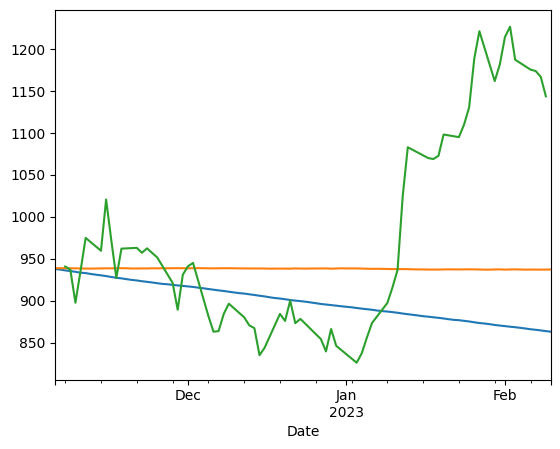

In [ ]:
precios_log_meli_simulados.mean(axis=1).plot()
precios_meli_simulados.mean(axis=1).plot()
data = getClose(ticker,fecha,ffinal)
data['MELI'].plot()


[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

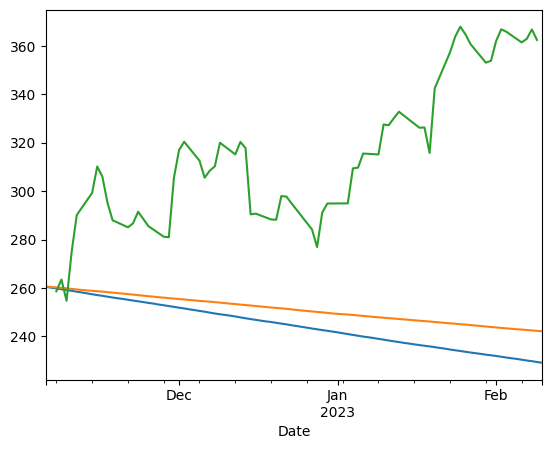

In [ ]:
precios_log_nflx_simulados.mean(axis=1).plot()
precios_nflx_simulados.mean(axis=1).plot()
data = getClose(ticker,fecha,ffinal)
data['NFLX'].plot()
